In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from scipy.stats import poisson
from scipy import stats

In [80]:
# Given data: positions of detected flashes along the coast
xk = np.array([4.73, 0.45, -1.73, 1.09, 2.19, 0.12, 1.31, 1.00, 1.32, 1.07, 0.86, -0.49, -2.59, 
               1.73, 2.11, 1.61, 4.98, 1.71, 2.23, -57.20, 0.96, 1.25, -1.56, 2.45, 1.19, 2.17,
               -10.66, 1.91, -4.16, 1.92, 0.10, 1.98, -2.51, 5.55, -0.47, 1.91, 0.95, -0.78, 
               -0.84, 1.72, -0.01, 1.48, 2.70, 1.21, 4.41, -4.79, 1.33, 0.81, 0.20, 1.58, 1.29,
               16.19, 2.75, -2.38, -1.79, 6.50, -18.53, 0.72, 0.94, 3.64, 1.94, -0.11, 1.57, 0.57])

# Number of flashes recorded
N = len(xk)

# Define the likelihood function
def likelihood(alpha, beta, xk):
    return np.prod(beta / (np.pi * (beta**2 + (xk - alpha)**2)))

# Define the prior distribution
def prior(alpha, beta):
    if 0 < alpha < 20 and 0 < beta < 10:
        return 1
    else:
        return 0

# Define the posterior distribution (unnormalized)
def posterior(alpha, beta, xk):
    return likelihood(alpha, beta, xk) * prior(alpha, beta)

# Monte Carlo simulation parameters
num_samples = 10000  # Number of samples to draw
alpha_samples = np.zeros(num_samples)
beta_samples = np.zeros(num_samples)

# Starting point (random initialization within reasonable bounds)
alpha_samples[0] = np.random.uniform(0, 20)
beta_samples[0] = np.random.uniform(0, 10)

# Store prior samples
prior_samples = []

# Track accepted proposals
accepted_proposals = 0

# Metropolis
for i in range(1, num_samples):
    # Propose new alpha and beta by adding a small random change
    alpha_proposal = alpha_samples[i-1] + np.random.normal(0, 0.5)
    beta_proposal = beta_samples[i-1] + np.random.normal(0, 0.3)
    
    # Calculate the posterior probability for the current and proposed positions
    current_posterior = posterior(alpha_samples[i-1], beta_samples[i-1], xk)
    proposed_posterior = posterior(alpha_proposal, beta_proposal, xk)
    
    # Acceptance probability
    acceptance_probability = min(1, proposed_posterior / current_posterior)
    
    # Accept or reject the new proposal
    if np.random.rand() < acceptance_probability:
        alpha_samples[i] = alpha_proposal
        beta_samples[i] = beta_proposal
        accepted_proposals += 1
    else:
        alpha_samples[i] = alpha_samples[i-1]
        beta_samples[i] = beta_samples[i-1]
    
    # Collect prior samples (only the accepted ones)
    prior_samples.append((alpha_proposal, beta_proposal))

# Estimated values (mean of the samples)
alpha_estimate = np.mean(alpha_samples)
beta_estimate = np.mean(beta_samples)

# Calculate and print the acceptance rate
acceptance_rate = accepted_proposals / num_samples * 100
print(f"Acceptance Rate: {acceptance_rate:.2f}%")
print(f"Estimated Alpha (α): {alpha_estimate:.2f}")
print(f"Estimated Beta (β): {beta_estimate:.2f}")



Acceptance Rate: 26.73%
Estimated Alpha (α): 1.25
Estimated Beta (β): 1.02


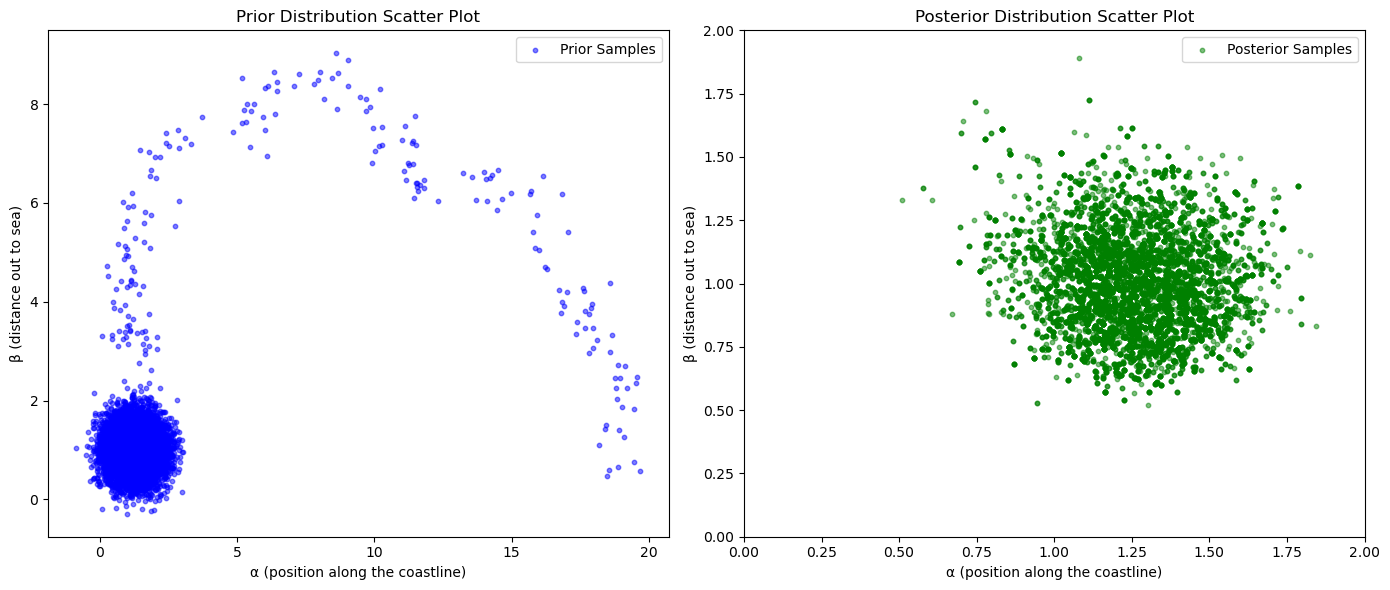

In [8]:
# Convert prior samples to numpy array for easier plotting
prior_samples = np.array(prior_samples)

# Plot the scatter plots for prior and posterior samples
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(prior_samples[:, 0], prior_samples[:, 1], color='blue', alpha=0.5, s=10, label='Prior Samples')
plt.xlabel('α (position along the coastline)')
plt.ylabel('β (distance out to sea)')
plt.title('Prior Distribution Scatter Plot')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(alpha_samples, beta_samples, color='green', alpha=0.5, s=10, label='Posterior Samples')
plt.xlabel('α (position along the coastline)')
plt.ylabel('β (distance out to sea)')
plt.title('Posterior Distribution Scatter Plot')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Trace Plots: α (position along the coastline) and 𝛽 (distance out to sea).
#If the trace plots show that the samples are fluctuating around a stable mean after some initial iterations (the burn-in period), 
#   it suggests that the chain has converged.

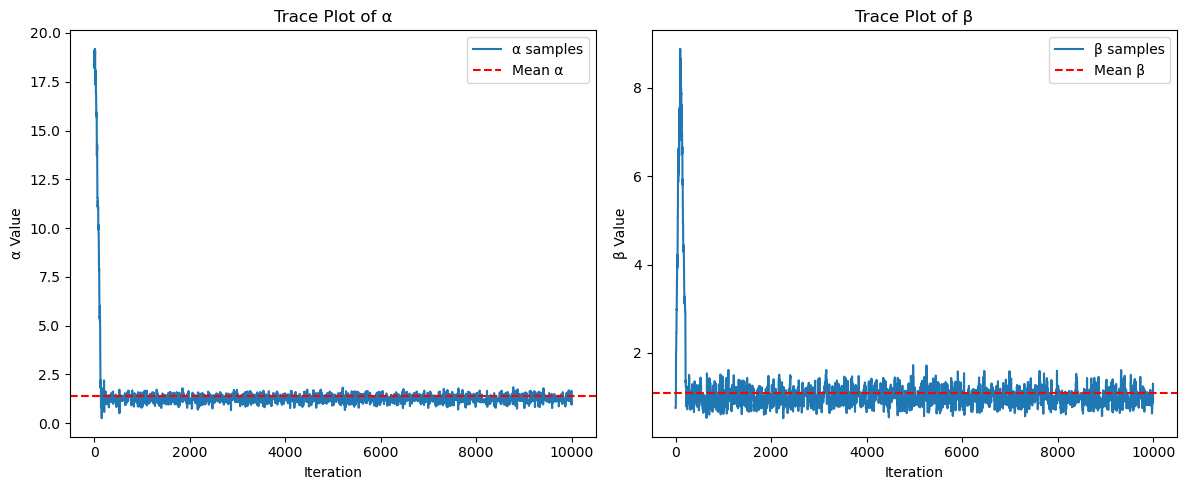

In [10]:
# to verify reults : 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_samples, label='α samples')
plt.axhline(np.mean(alpha_samples), color='r', linestyle='--', label='Mean α')
plt.xlabel('Iteration')
plt.ylabel('α Value')
plt.title('Trace Plot of α')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(beta_samples, label='β samples')
plt.axhline(np.mean(beta_samples), color='r', linestyle='--', label='Mean β')
plt.xlabel('Iteration')
plt.ylabel('β Value')
plt.title('Trace Plot of β')
plt.legend()

plt.tight_layout()
plt.show()


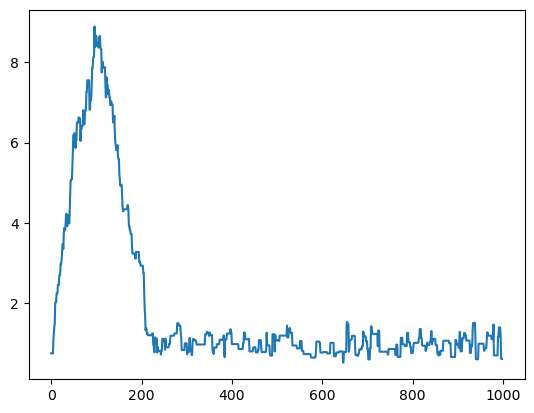

In [13]:
plt.plot(beta_samples[1:1000], label='β samples')


In [ ]:
# Posterior Distribution Inspection 
# Visualize the posterior distributions of 𝛼 and 𝛽,
# ensure they are reasonable and not overly influenced by your priors. 

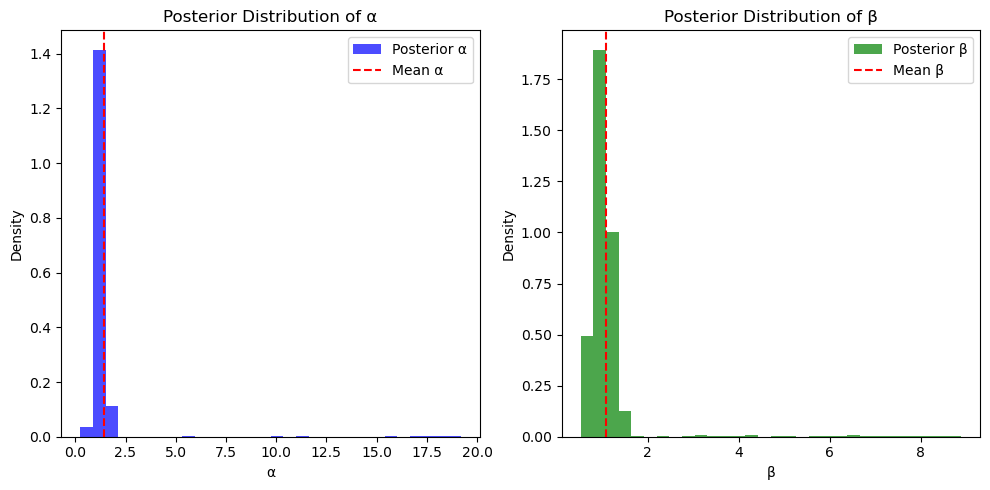

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=30, density=True, alpha=0.7, color='blue', label='Posterior α')
plt.axvline(alpha_estimate, color='red', linestyle='--', label='Mean α')
plt.xlabel('α')
plt.ylabel('Density')
plt.title('Posterior Distribution of α')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(beta_samples, bins=30, density=True, alpha=0.7, color='green', label='Posterior β')
plt.axvline(beta_estimate, color='red', linestyle='--', label='Mean β')
plt.xlabel('β')
plt.ylabel('Density')
plt.title('Posterior Distribution of β')
plt.legend()

plt.tight_layout()
plt.show()
